<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/CNN_PICKLE_tafiic_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open('/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

36

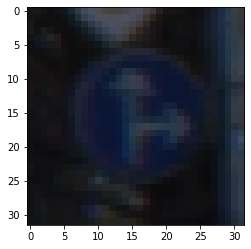

In [ ]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [ ]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

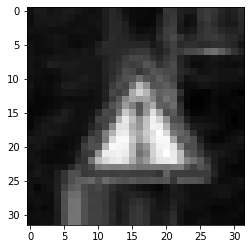

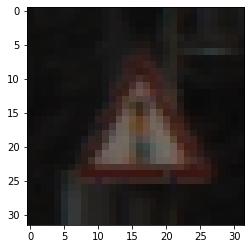

In [ ]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
#from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [ ]:
image_shape = X_train_gray[i].shape

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='Adam',metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 13s 13ms/step - loss: 3.2135 - accuracy: 0.1576 - val_loss: 2.8718 - val_accuracy: 0.2673
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 1.7290 - accuracy: 0.5210 - val_loss: 1.5199 - val_accuracy: 0.5560
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 0.9081 - accuracy: 0.7350 - val_loss: 1.0042 - val_accuracy: 0.6819
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6336 - accuracy: 0.8211 - val_loss: 0.8208 - val_accuracy: 0.7524
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4868 - accuracy: 0.8671 - val_loss: 0.7484 - val_accuracy: 0.7703
Epoch 6/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4069 - accuracy: 0.8898 - val_loss: 0.6609 - val_accuracy: 0.8009
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3427 - accuracy: 0.9090 - val_loss: 0.6753 - val_accuracy: 0.8088
Epoch 8/50
70/70 [

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8823


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

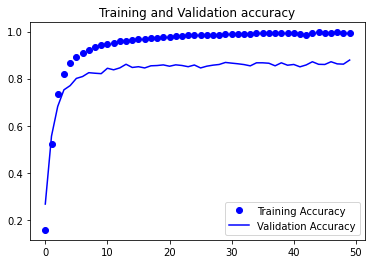

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

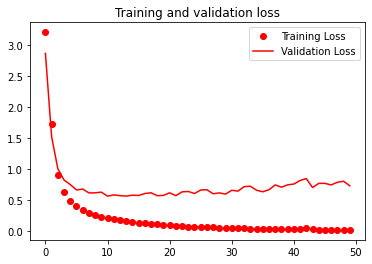

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm),axis=-1)
#predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


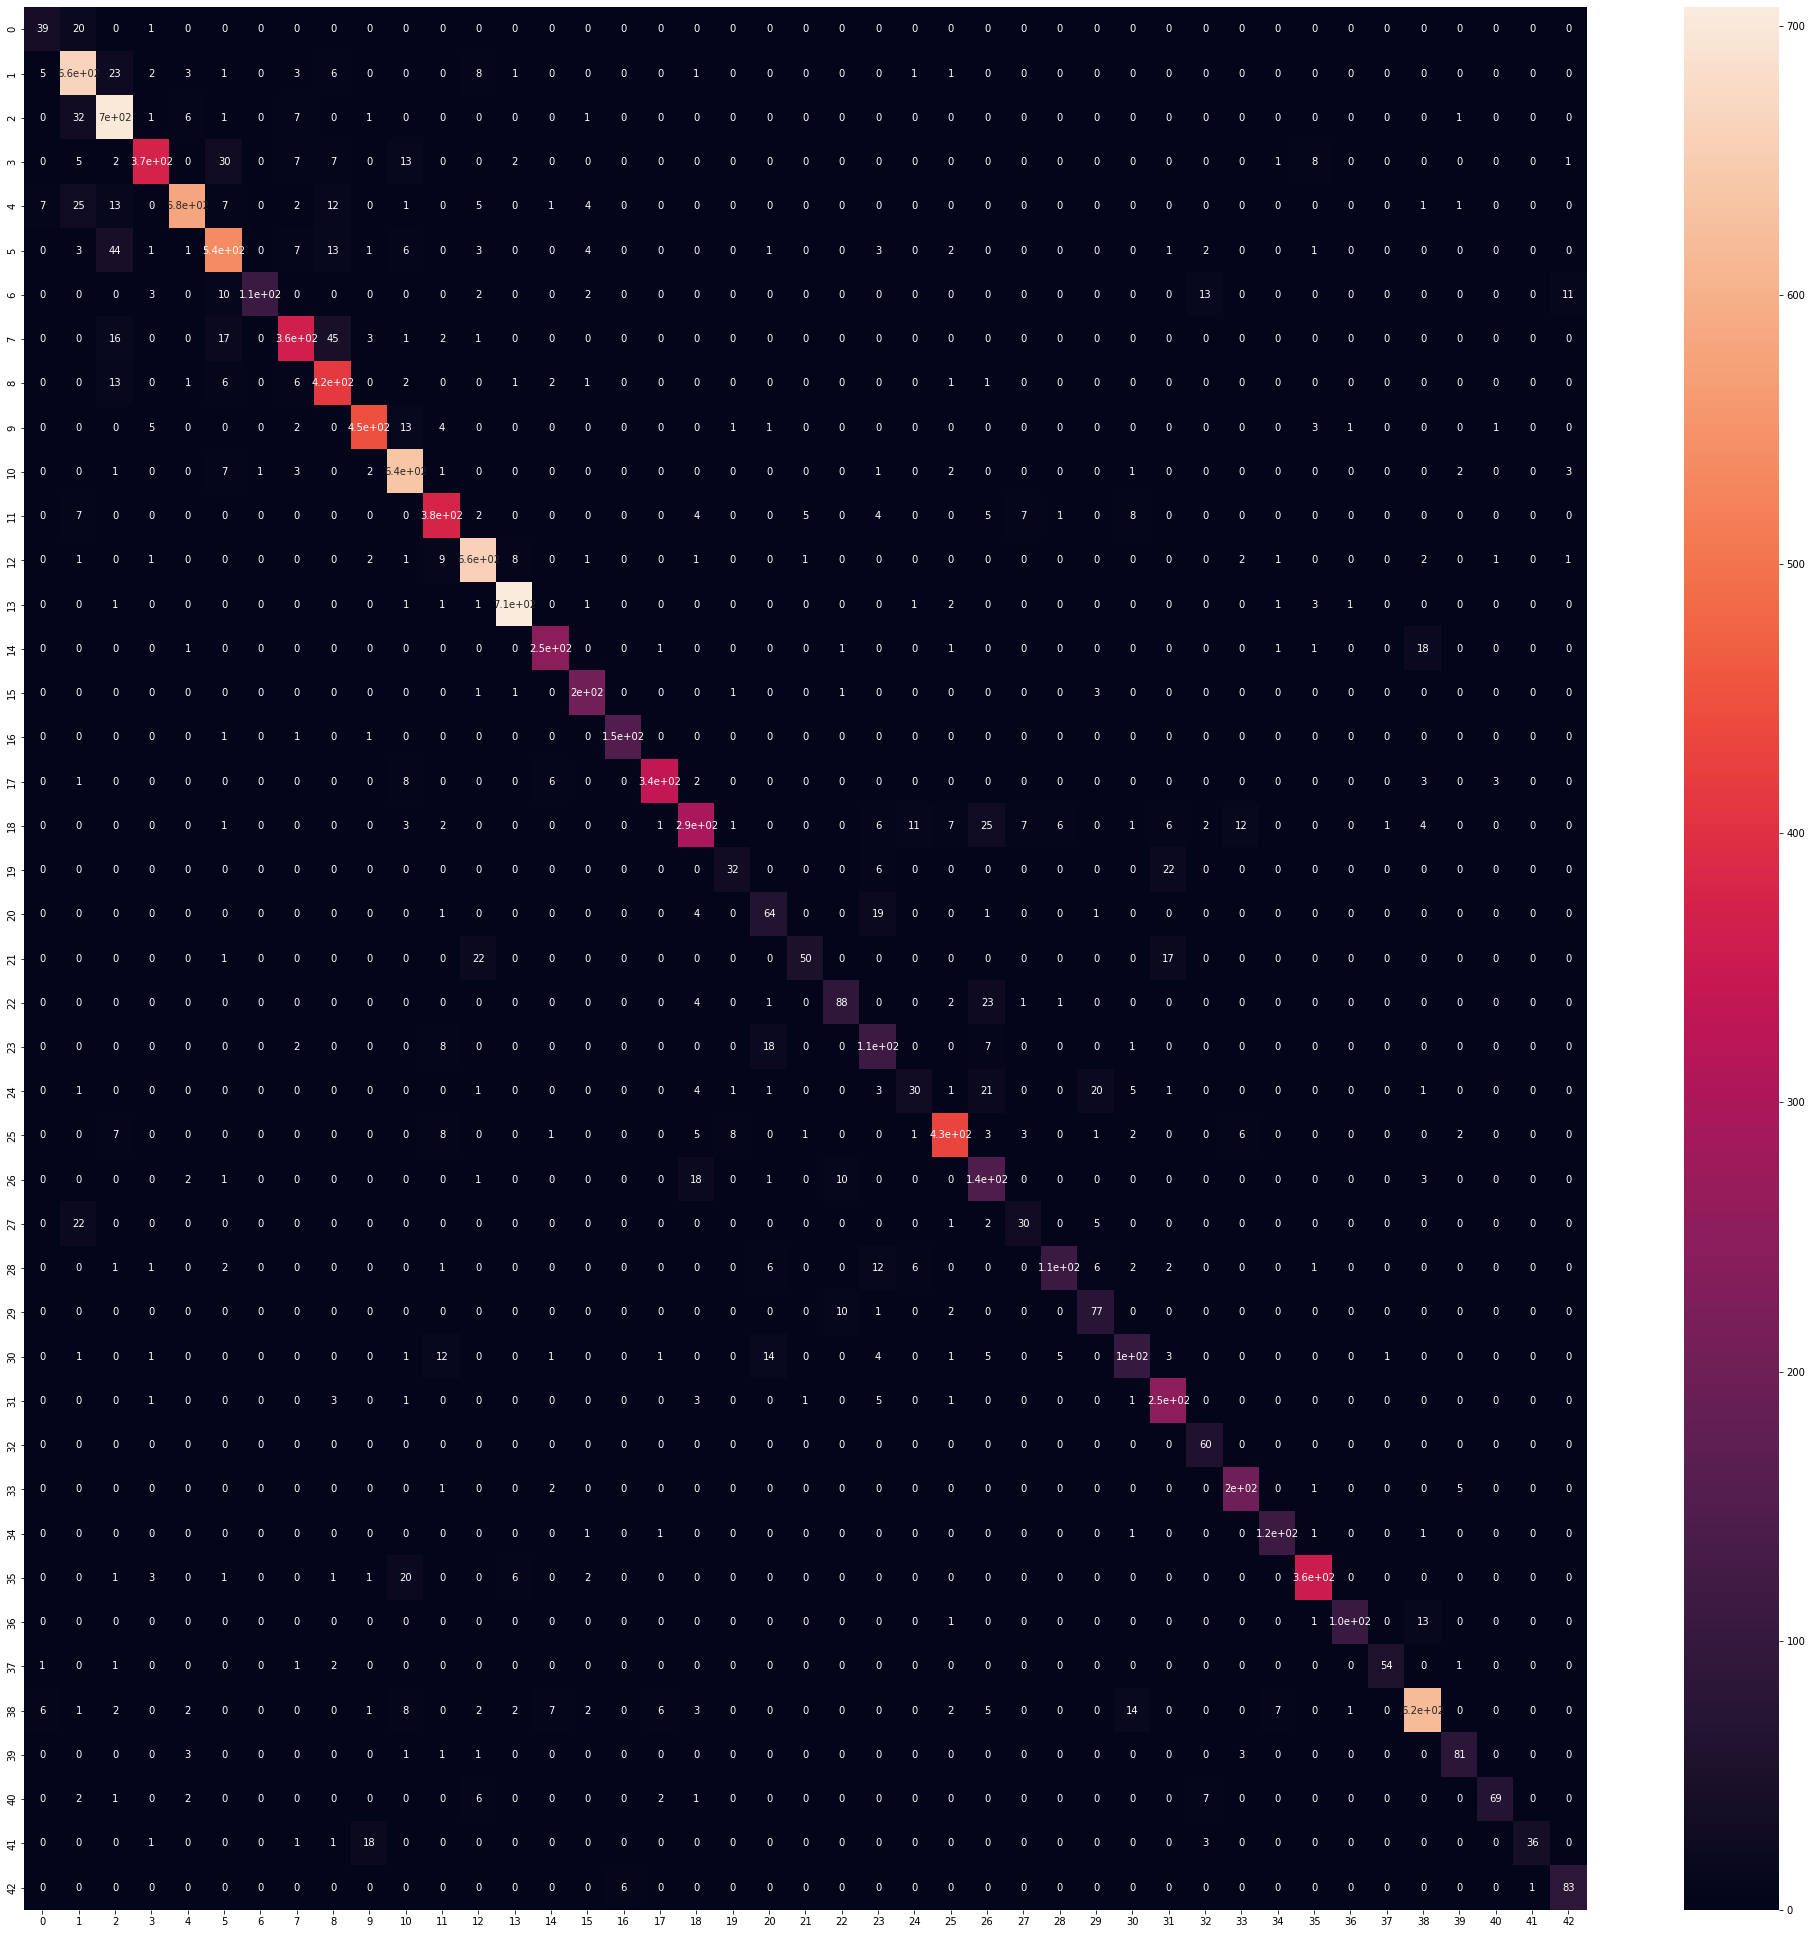

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (35,35))
sns.heatmap(cm, annot=True)

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
cm

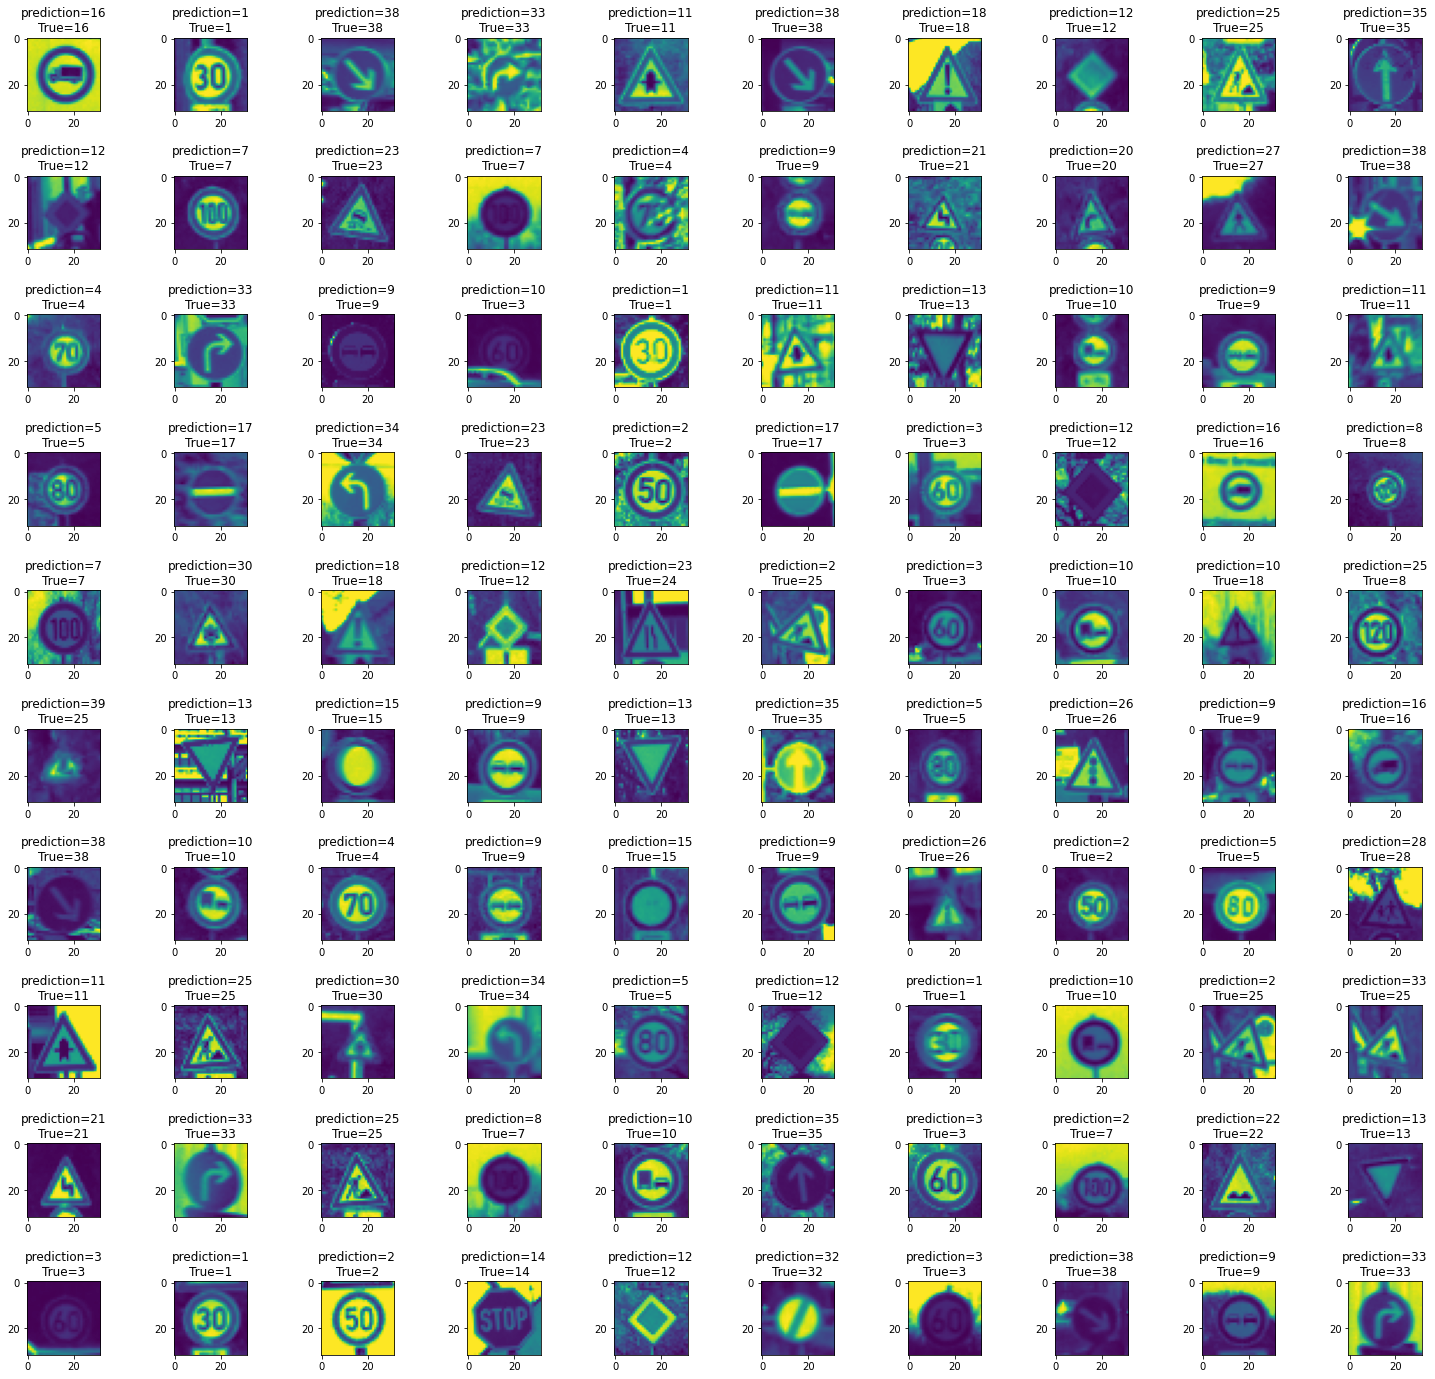

In [ ]:
fig, axes=plt.subplots(10,10,figsize=(25,25))
axes=axes.ravel()


for i in np.arange(0,10*10):
    1
   # index=np.random.ran0000000000000000000000000dint(0,n_training)
    axes[i].imshow(X_test_gray_norm[i].squeeze())
    axes[i].set_title('prediction={}\nTrue={}'.format(predicted_classes[i],y_true[i]))
    plt.subplots_adjust(wspace=1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(classification_report(y_true, predicted_classes))